In [1]:
import pandas as pd
from datetime import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# https://www.cryptoarchive.com.au/asset/DOGE --> Doge EUR
folderpath = "../../Data/QMEF/"

df = pd.read_csv(folderpath + 'DOGEUSDT.csv', sep='|', header=None)

# https://www.cryptoarchive.com.au/faq
df.columns = ['timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Taker Buy Quote Asset Volume', 
                'Taker Buy Base Asset Volume', 'Quote Asset Volume', 'Number of trades']
# Quote Asset Volume verwenden. Volume ist im Verhältnis zu BTC.

df

,timestamp,Open,High,Low,Close,Volume,Taker Buy Quote Asset Volume,Taker Buy Base Asset Volume,Quote Asset Volume,Number of trades
0,1562328000,0.00449,0.004600,0.003760,0.004200,60726008.0,175346.0,40516981.0,259378.0,521
1,1562328060,0.00420,0.004387,0.004200,0.004300,84307704.0,173855.0,40173084.0,363011.0,561
2,1562328120,0.00430,0.004475,0.004300,0.004475,48182744.0,144634.0,33036098.0,210232.0,291
3,1562328180,0.00445,0.004450,0.004169,0.004250,66457853.0,35933.0,8266236.0,285858.0,289
4,1562328240,0.00425,0.004385,0.004250,0.004350,22016425.0,43020.0,9954068.0,95311.0,179
...,...,...,...,...,...,...,...,...,...,...
2129373,1690274520,0.07634,0.076400,0.076300,0.076310,3397058.0,146491.0,1918939.0,259348.0,403
2129374,1690274580,0.07630,0.076300,0.076030,0.076150,5322564.0,149650.0,1965814.0,405259.0,840
2129375,1690274640,0.07615,0.076160,0.075640,0.075960,10316943.0,279871.0,3685975.0,783300.0,1978
2129376,1690274700,0.07597,0.076180,0.075950,0.076170,7391049.0,274058.0,3601303.0,562510.0,623


In [60]:
df_tweets = pd.read_csv("../../Data/QMEF/tweet_analysis.csv", sep=";", encoding='utf8', parse_dates=['CreatedAt', 'UTC'])
df_tweets.drop_duplicates('TweetId', inplace = True)

df_tweets['timestamp'] = df_tweets['UTC'].apply(lambda x: x.astype('int')//10**9)
df_tweets['timestamp'] = df_tweets['timestamp'] - (df_tweets['timestamp'] % 60) #Abrunden auf Minuten

df_tweets = df_tweets[['UTC', 'timestamp', 'Text', 'Favorites', 'Retweets', 'neg', 'neu', 'pos', 'compound']]
# df_tweets = df_tweets.merge(df_doge, left_on='Date', right_on='Date')
df_tweets_relevant = df_tweets.loc[(df_tweets['Favorites'] >= 500_000) & (df_tweets['Retweets'] >= 50_000)].copy()
# df_tweets_relevant = df_tweets.loc[(df_tweets['timestamp'] == 1617272700)].copy()
df_tweets_relevant

,UTC,timestamp,Text,Favorites,Retweets,neg,neu,pos,compound
9,2021-02-10 15:08:11+00:00,1612969680,"Bought some Dogecoin for lil X, so he can be a...",548940,59215,0.000,1.000,0.000,0.0000
15,2021-05-13 22:45:16+00:00,1620945900,Working with Doge devs to improve system trans...,512735,84083,0.000,0.497,0.503,0.7964
19,2021-02-04 08:27:10+00:00,1612427220,"No highs, no lows, only Doge",773919,113814,0.253,0.346,0.401,0.0721
20,2021-02-04 08:15:26+00:00,1612426500,Dogecoin is the people’s crypto,554302,103909,0.000,1.000,0.000,0.0000
24,2021-04-01 10:25:23+00:00,1617272700,SpaceX is going to put a literal Dogecoin on t...,547562,53429,0.000,1.000,0.000,0.0000
27,2021-05-09 22:41:43+00:00,1620600060,SpaceX launching satellite Doge-1 to the moon ...,537909,118943,0.000,1.000,0.000,0.0000
31,2021-02-07 22:25:14+00:00,1612736700,🎶 Who let the Doge out 🎶,787296,114617,0.000,1.000,0.000,0.0000


C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



841672    0.000000
841673   -0.001769
841674    0.002124
841675    0.001990
841676    0.002733
841677    0.000003
841678   -0.002740
841679   -0.002667
841680    0.000848
841681   -0.001828
Name: log_returns, dtype: float64
Expected Return =  -6.435561389600386e-05
T =  1.462504480269266


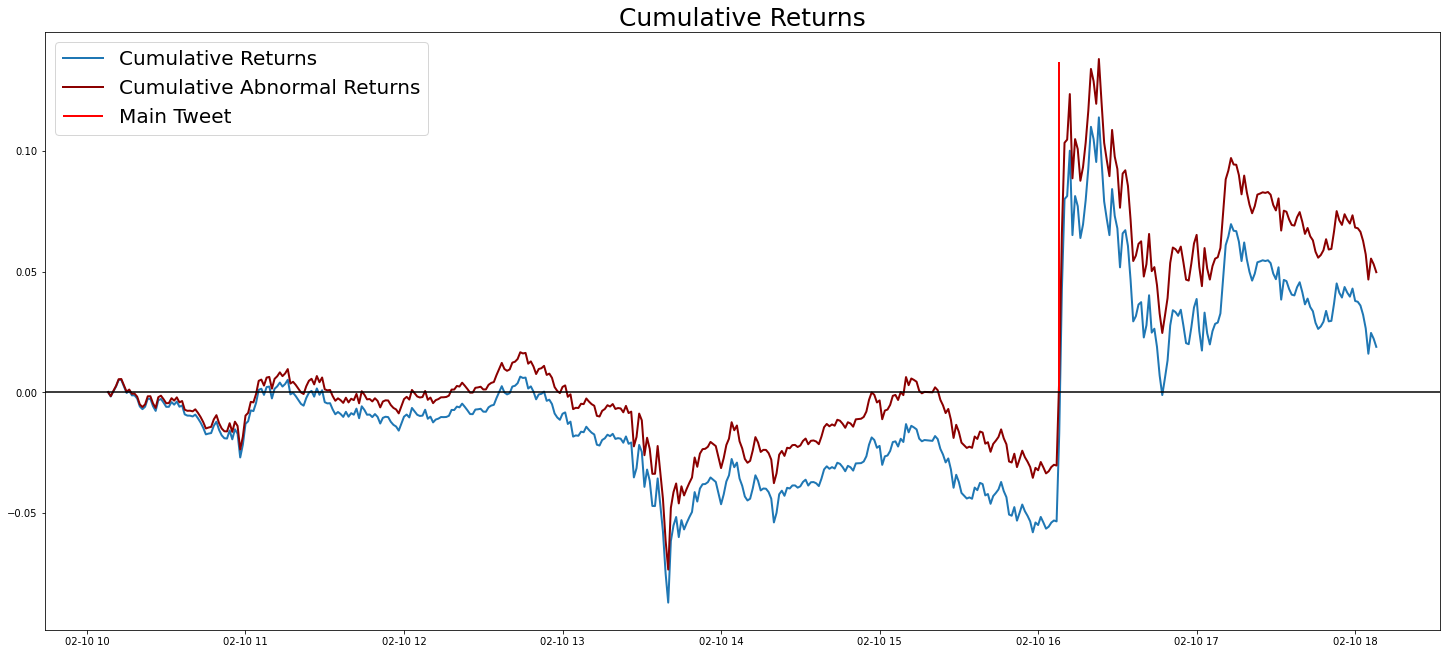

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



974006    0.000000
974007   -0.004715
974008   -0.000697
974009    0.002362
974010   -0.003582
974011    0.003955
974012   -0.011761
974013    0.003686
974014   -0.003284
974015    0.007828
Name: log_returns, dtype: float64
Expected Return =  0.00010887077577759035
T =  1.5140698722431378


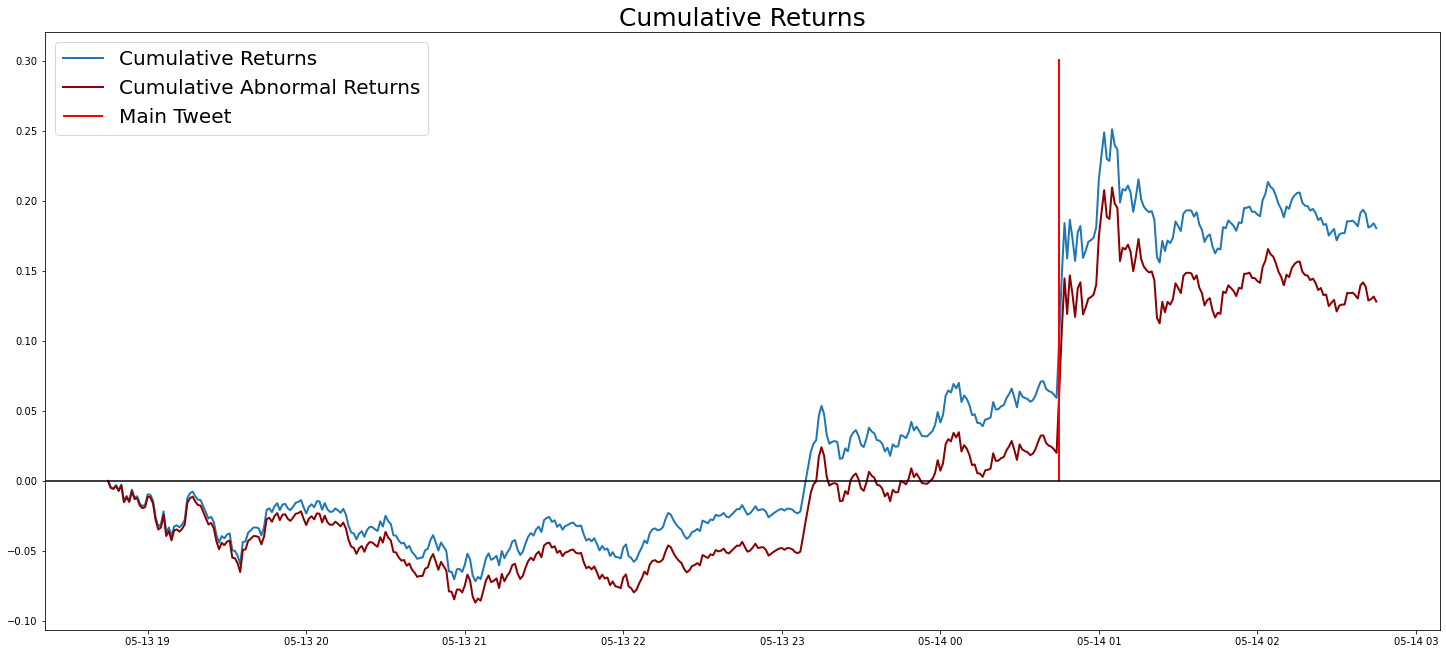

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



832631    0.000000
832632   -0.003373
832633    0.004989
832634    0.003973
832635    0.002092
832636    0.008166
832637    0.001256
832638   -0.002624
832639    0.010960
832640    0.012784
Name: log_returns, dtype: float64
Expected Return =  0.00023337466903452389
T =  0.32328317393390177


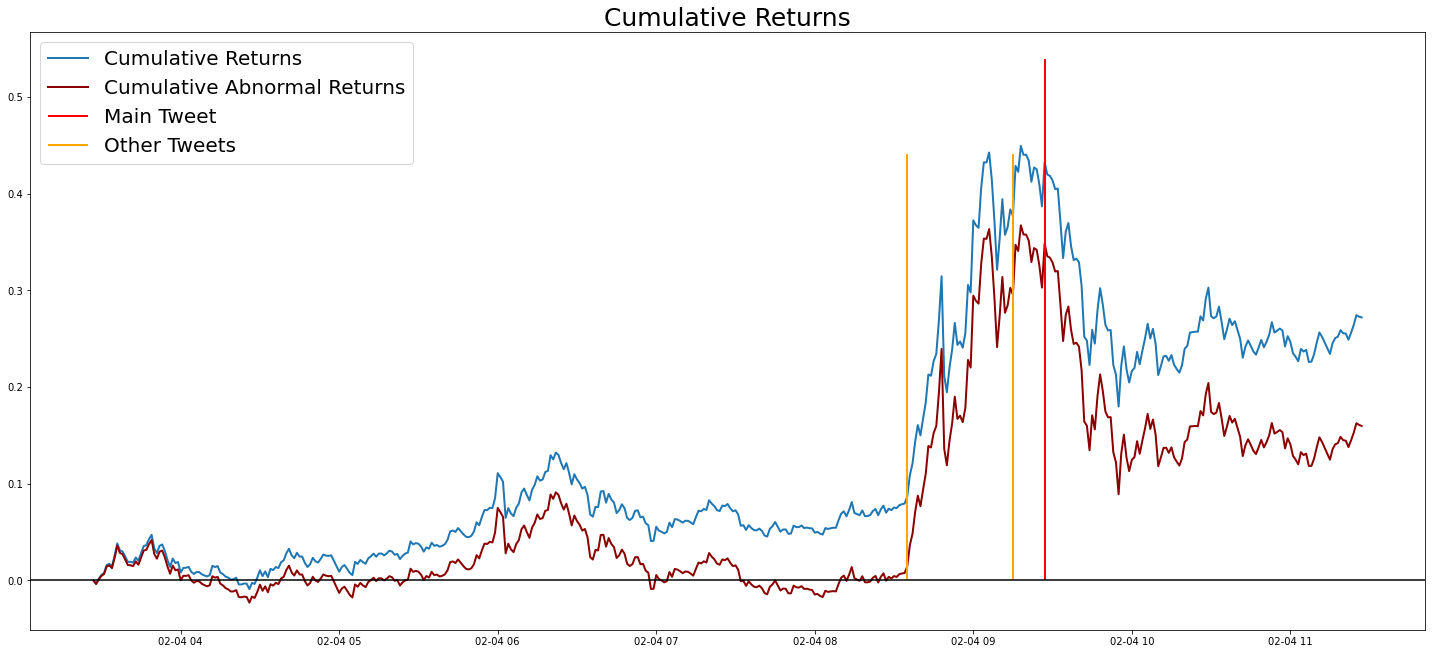

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



832619    0.000000
832620    0.003370
832621    0.004163
832622    0.005549
832623    0.004517
832624    0.012777
832625   -0.004294
832626   -0.009276
832627   -0.002808
832628    0.002160
Name: log_returns, dtype: float64
Expected Return =  0.00029670338510299766
T =  0.9043449950214995


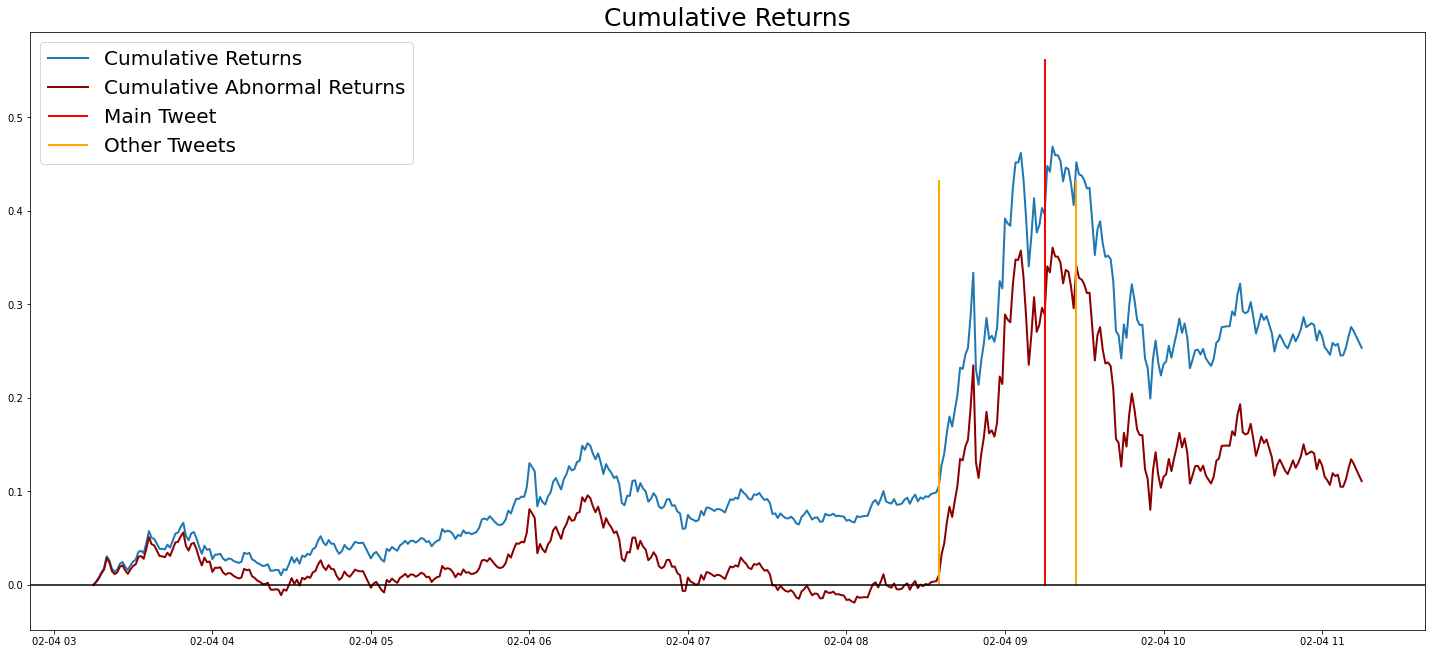

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



913220    0.000000
913221   -0.000076
913222   -0.000379
913223   -0.000240
913224    0.000026
913225    0.000081
913226    0.000530
913227    0.000129
913228    0.000733
913229   -0.000257
Name: log_returns, dtype: float64
Expected Return =  -1.6371252156740373e-05
T =  2.958943059495974


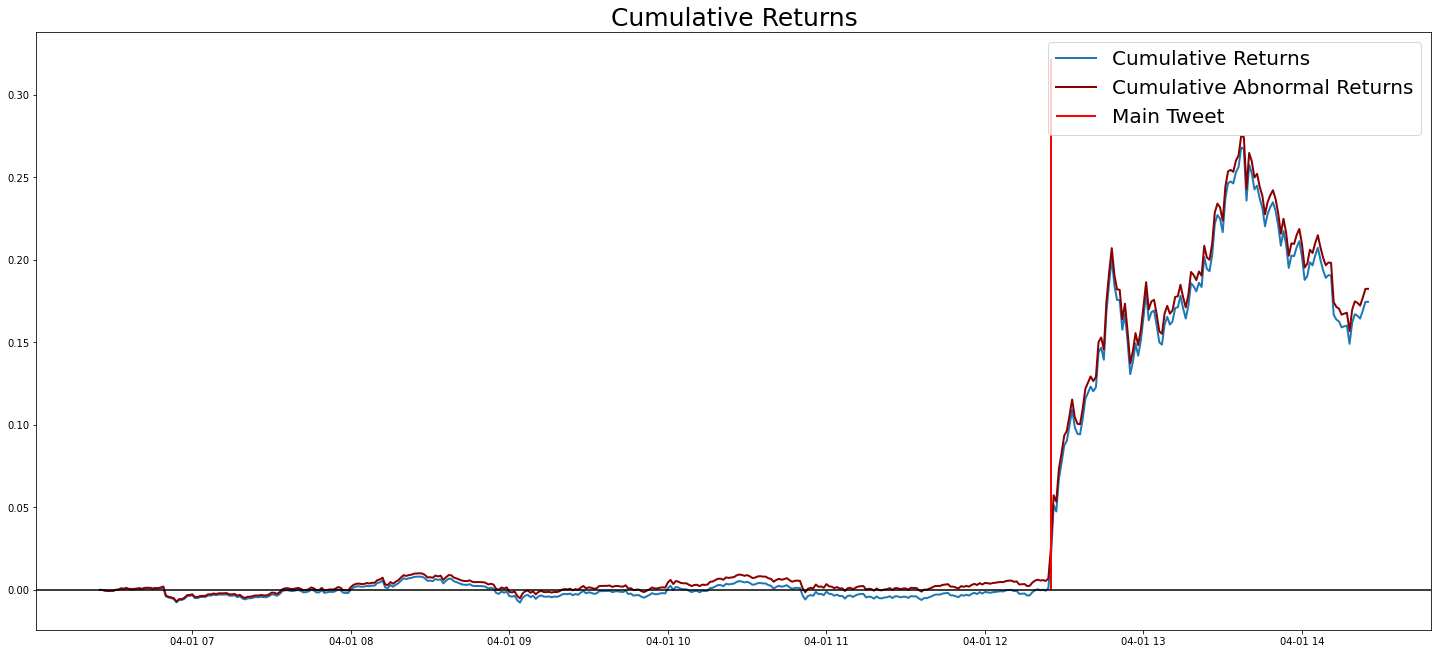

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



968242    0.000000
968243    0.002950
968244   -0.003683
968245   -0.002184
968246    0.009111
968247   -0.001499
968248    0.003986
968249    0.002481
968250    0.002615
968251   -0.004733
Name: log_returns, dtype: float64
Expected Return =  0.0003817275321941493
T =  2.443118029056409


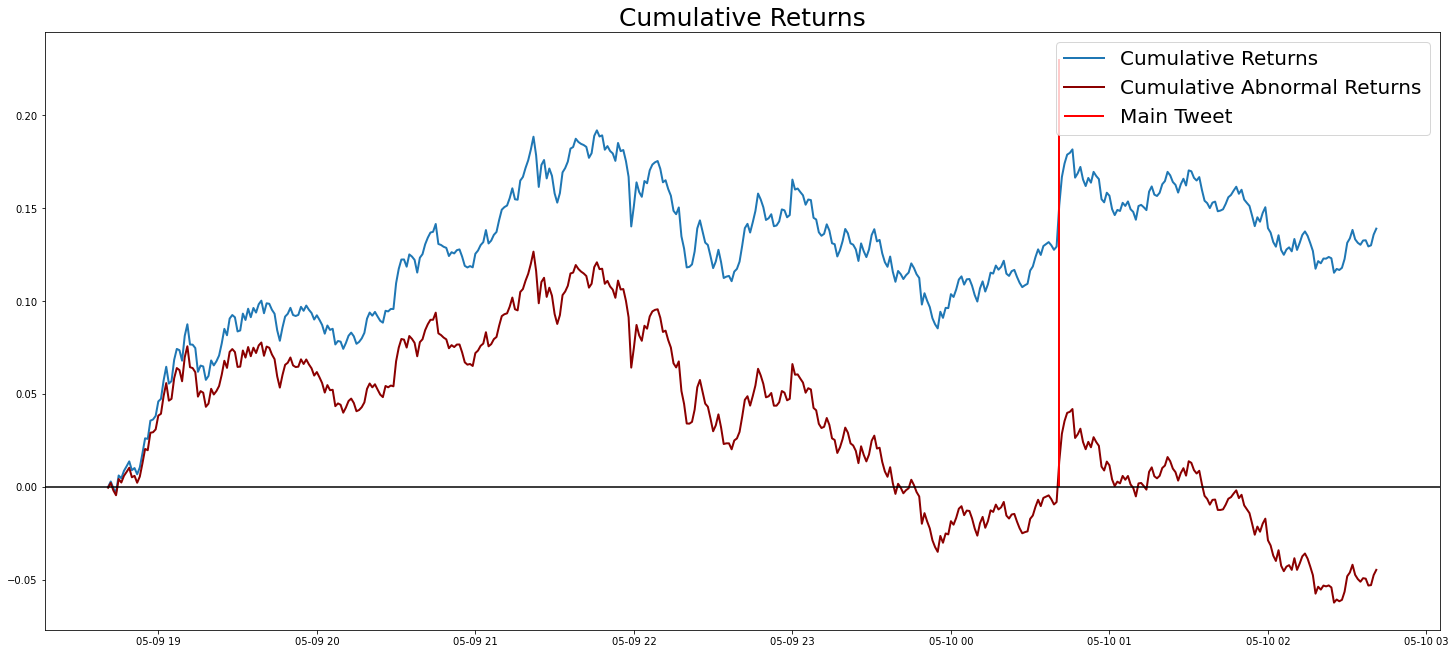

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['log_returns'].iloc[0] = 0
C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



837789    0.000000
837790   -0.010368
837791   -0.018467
837792   -0.002306
837793    0.010580
837794   -0.011653
837795   -0.002068
837796   -0.000701
837797    0.002187
837798    0.019533
Name: log_returns, dtype: float64
Expected Return =  0.00031219382768720745
T =  1.090932677314183


C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\777836056.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['abnormal_returns_cum'] = np.cumsum(doge_sliced['abnormal_returns'])


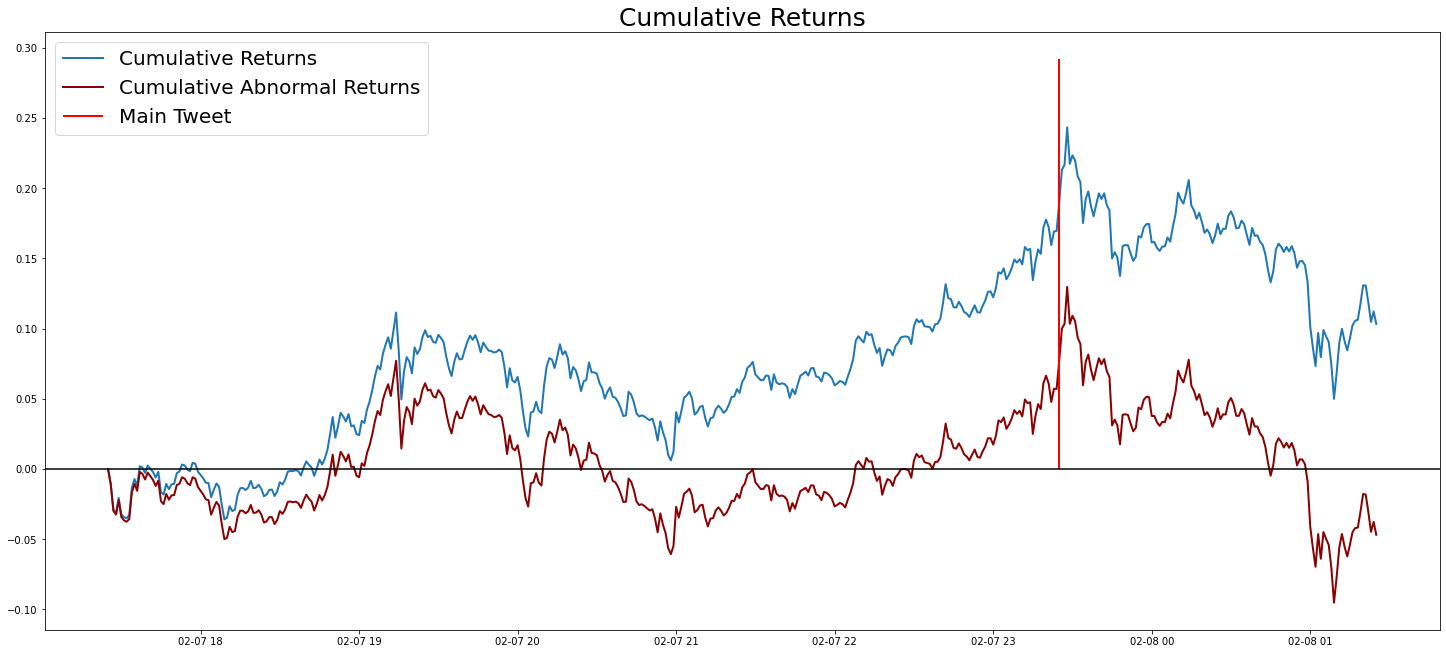

In [62]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-360*60) & (df['timestamp'] <= timestamp+120*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]
    
    doge_sliced['log_returns'] = np.log(doge_sliced['Close'] / doge_sliced['Close'].shift(1))
    doge_sliced['log_returns'].iloc[0] = 0
    print(doge_sliced['log_returns'].iloc[0:10])
    # doge_sliced['dlog_prices'] = [0]*len(doge_sliced['log_prices'])
    
    # Super ineffizient
    # for i in range(1, len(doge_sliced['log_prices'])):
    #     doge_sliced['dlog_prices'].iloc[i] = doge_sliced['log_prices'].iloc[i] - doge_sliced['log_prices'].iloc[(i-1)]

    doge_sliced['cum_log_returns'] = np.cumsum(doge_sliced['log_returns'])

    # Expected Returns which are based on the mean value of the returns of the last 5 hours before the tweet.
    # Event Takes place at t=360
    expected_return = np.mean(doge_sliced['log_returns'].iloc[1:301]) # Fehler bei Ante, da Ante 1:301 nimmt und nicht 0:300
    print('Expected Return = ', expected_return)
    
    # Abnormal Returns based on After Returns - Mean Value of Returns (before Tweet)
    doge_sliced['abnormal_returns'] = doge_sliced['log_returns'] - expected_return
    doge_sliced['abnormal_returns_cum'] = np.cumsum(doge_sliced['abnormal_returns'])

    # doge_sliced['CAR'] = doge_sliced['Close']/base_value

    
    car_1 = np.sum(doge_sliced['abnormal_returns'].iloc[360:366])
    # print(doge_sliced['abnormal_returns'].iloc[360:366])
    var_1 = np.var(doge_sliced['abnormal_returns'].iloc[360:366])
    
    car_2 = np.sum(doge_sliced['abnormal_returns'].iloc[359:365])
    # print(doge_sliced['abnormal_returns'].iloc[359:365])
    var_2 = np.var(doge_sliced['abnormal_returns'].iloc[359:365])
    
    # print('CAR_1', car_1)
    # print('VAR_1', var_1)
    # print('T = ', (doge_sliced['abnormal_returns'].iloc[359:365].mean() / doge_sliced['abnormal_returns'].iloc[359:365].std()) * np.sqrt(6))
    # print('CAR_2', car_2)
    # print('VAR_2', var_2)
    print('T = ', (doge_sliced['abnormal_returns'].iloc[360:366].mean() / doge_sliced['abnormal_returns'].iloc[360:366].std()) * np.sqrt(6)) # <-- richtiger Wert

    fig = plt.figure(1, figsize = (25, 11))
    plt.plot(doge_sliced["Date"], doge_sliced['cum_log_returns'], lw=2, label='Cumulative Returns')
    plt.plot(doge_sliced["Date"], doge_sliced['abnormal_returns_cum'], lw=2, label='Cumulative Abnormal Returns', color='darkred')
    plt.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['cum_log_returns'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        plt.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['abnormal_returns_cum'].max()*1.2, colors='orange', lw=2) 
    plt.axhline(0, color = 'black')
    plt.legend(loc='best', fontsize=20)
    plt.title('Cumulative Returns', size=25)

    plt.show()

    #print(tweet['Text'])

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


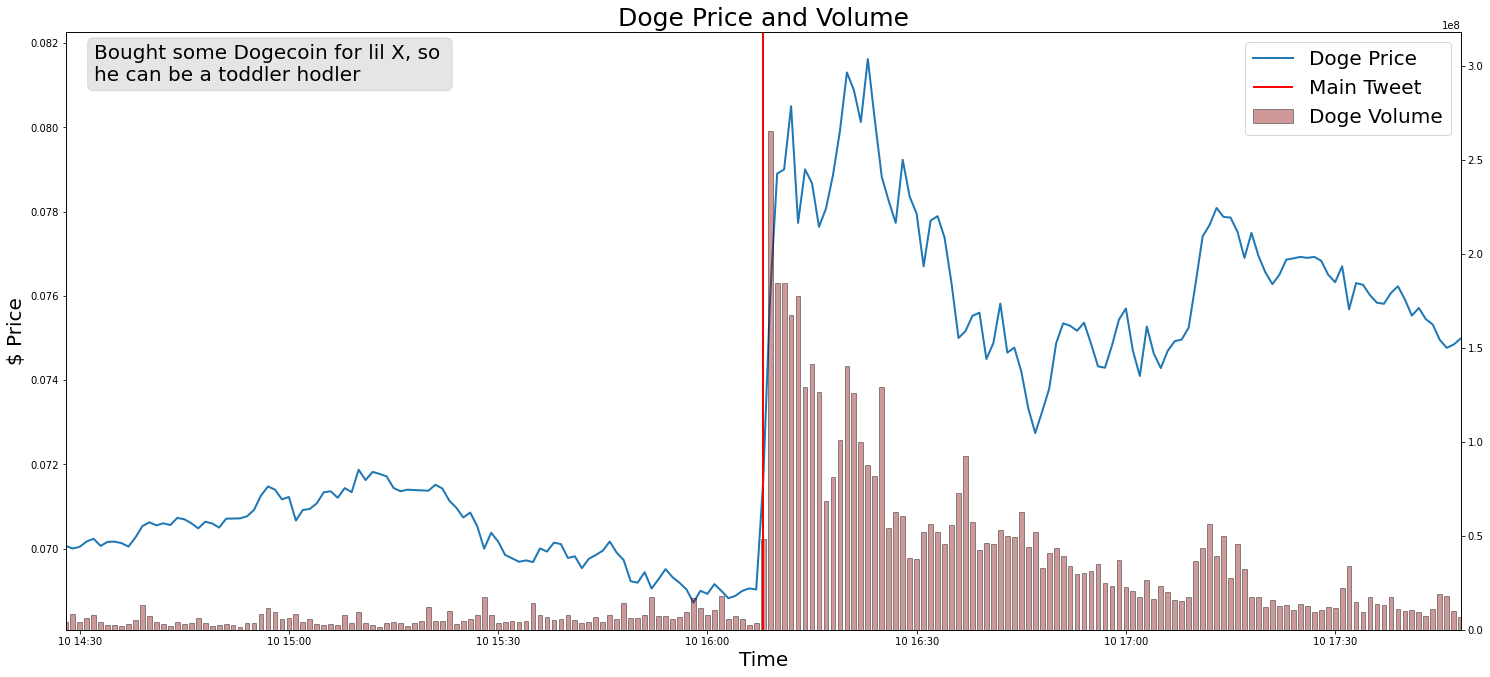

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


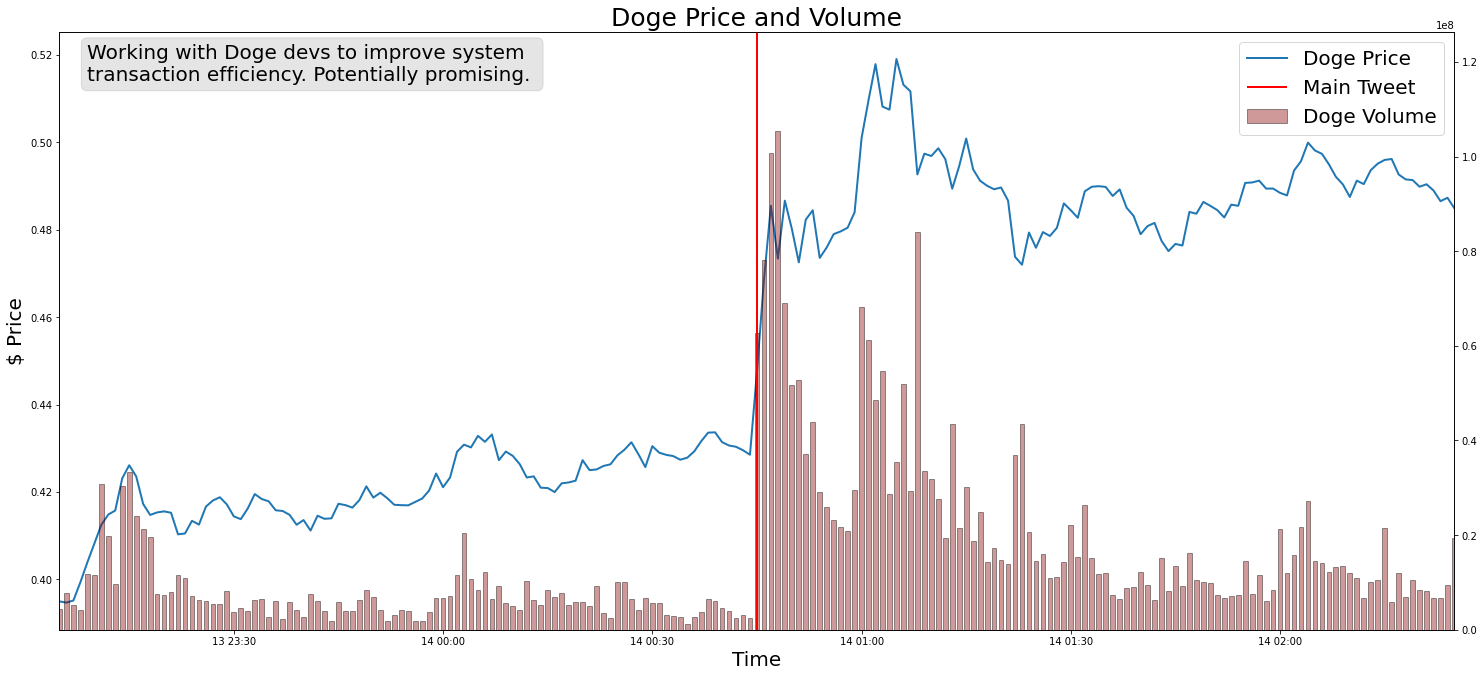

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


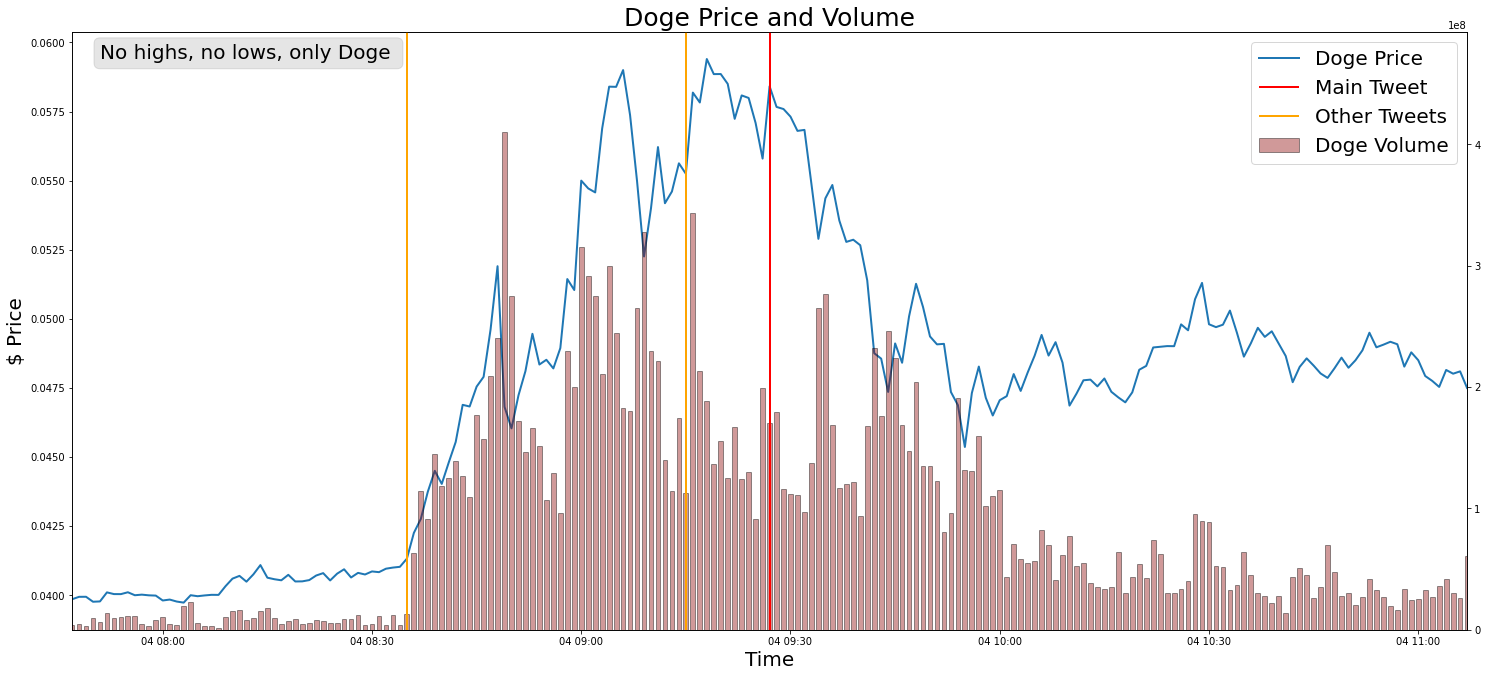

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


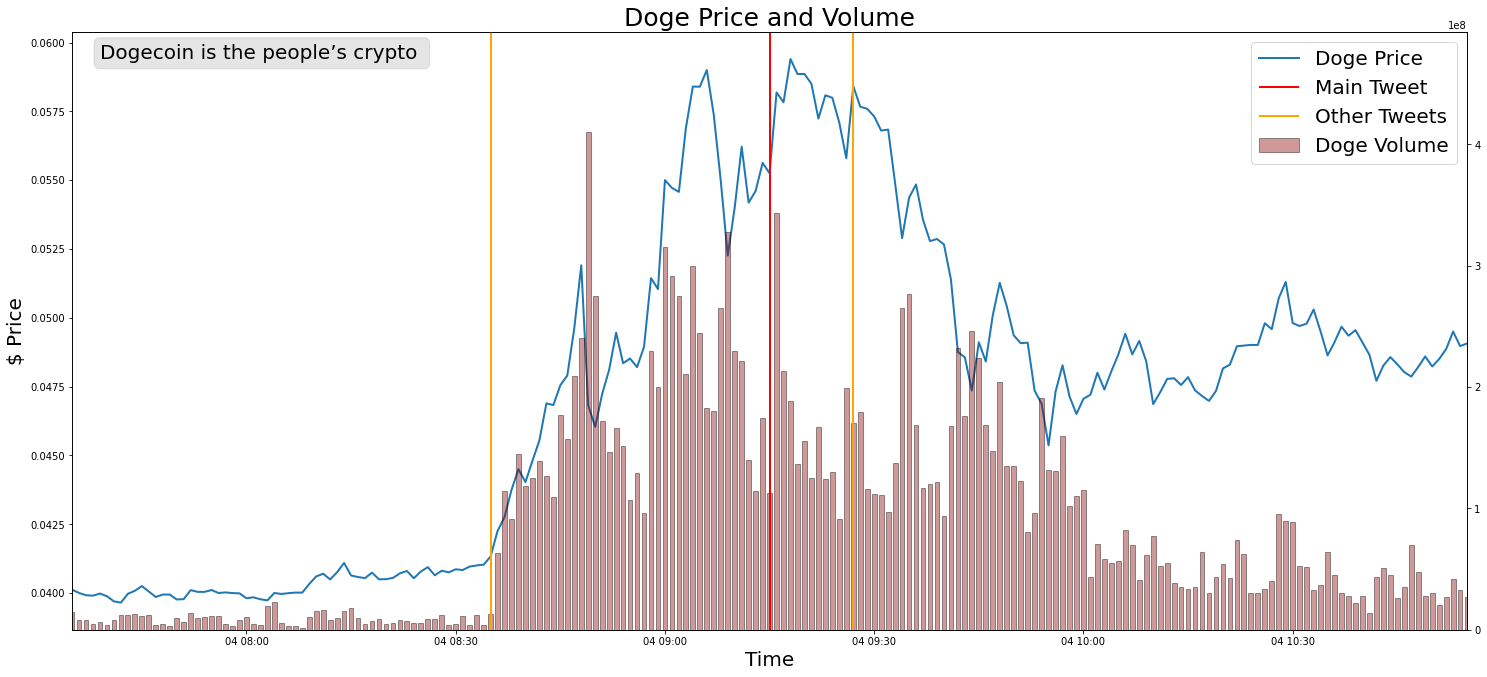

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


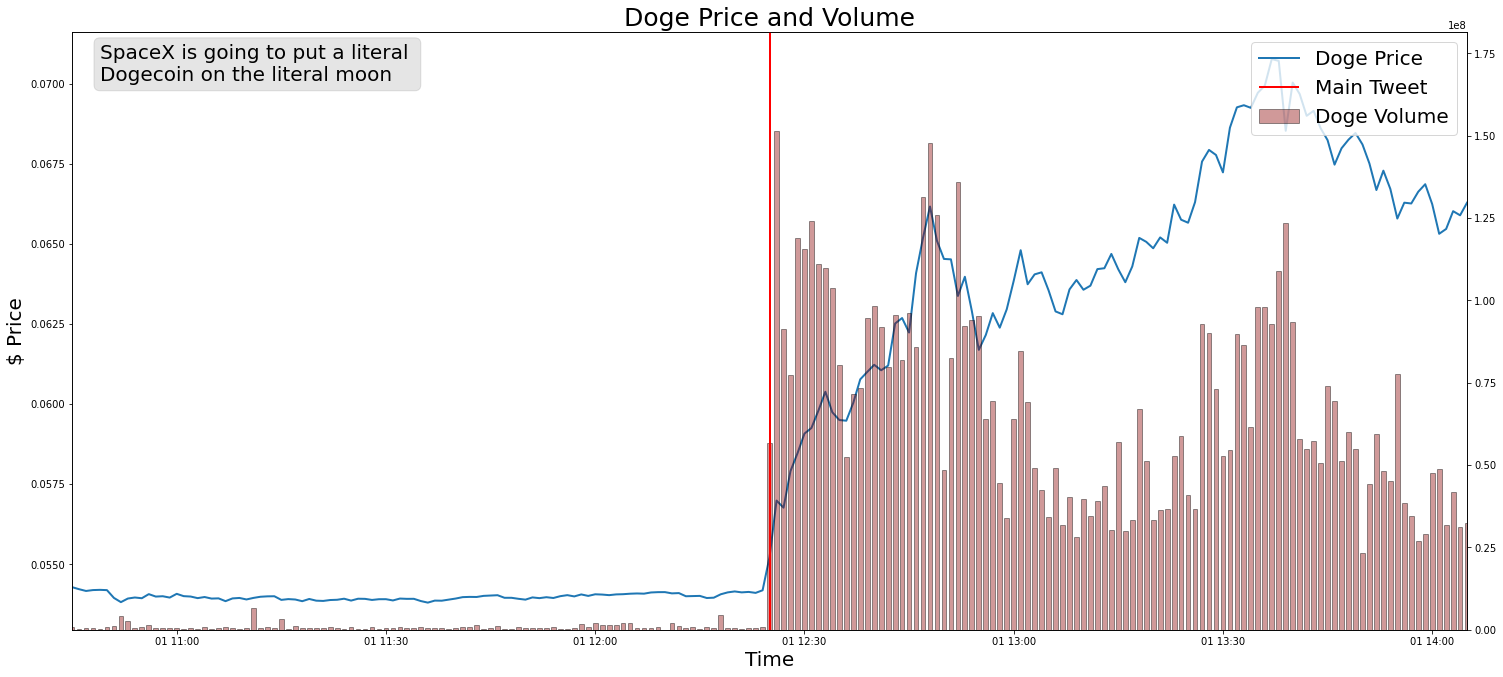

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value


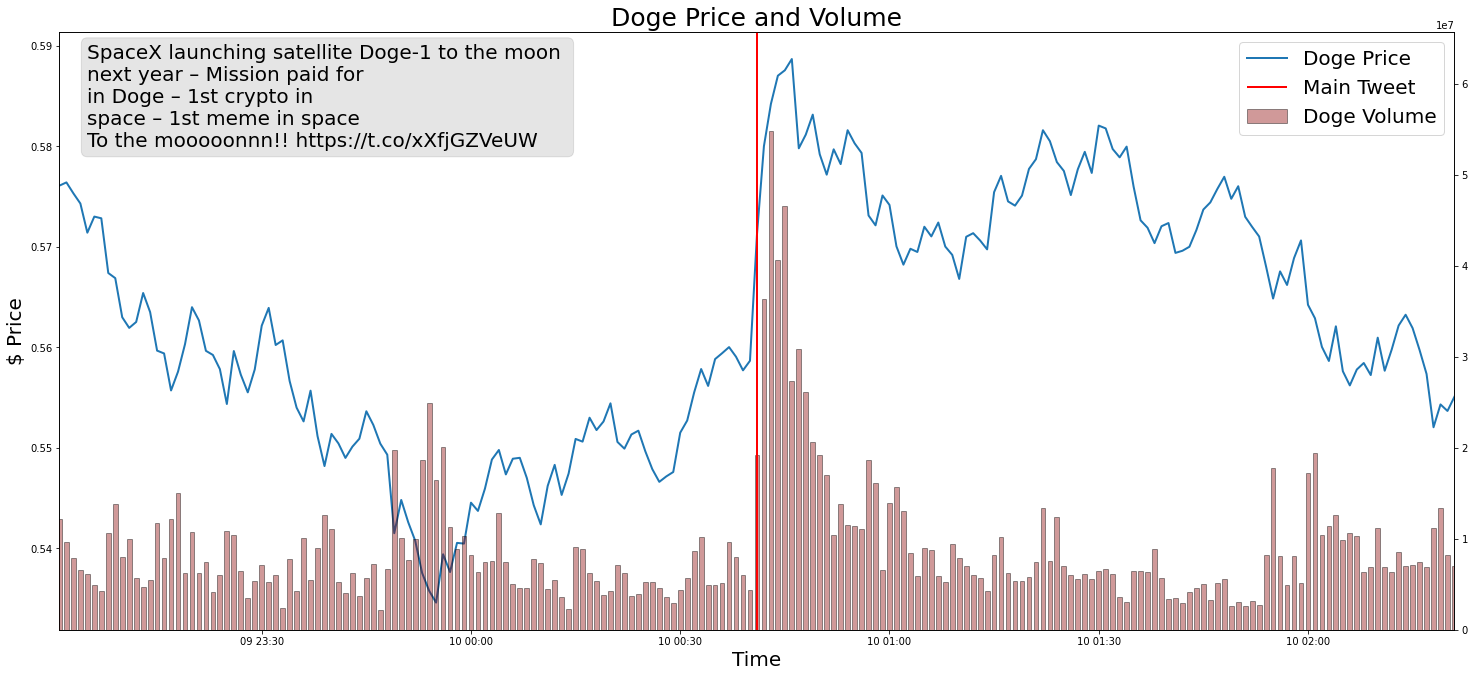

C:\Users\ckopp\AppData\Local\Temp\ipykernel_20328\2113527702.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  doge_sliced['CAR'] = doge_sliced['Close']/base_value
C:\Users\ckopp\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


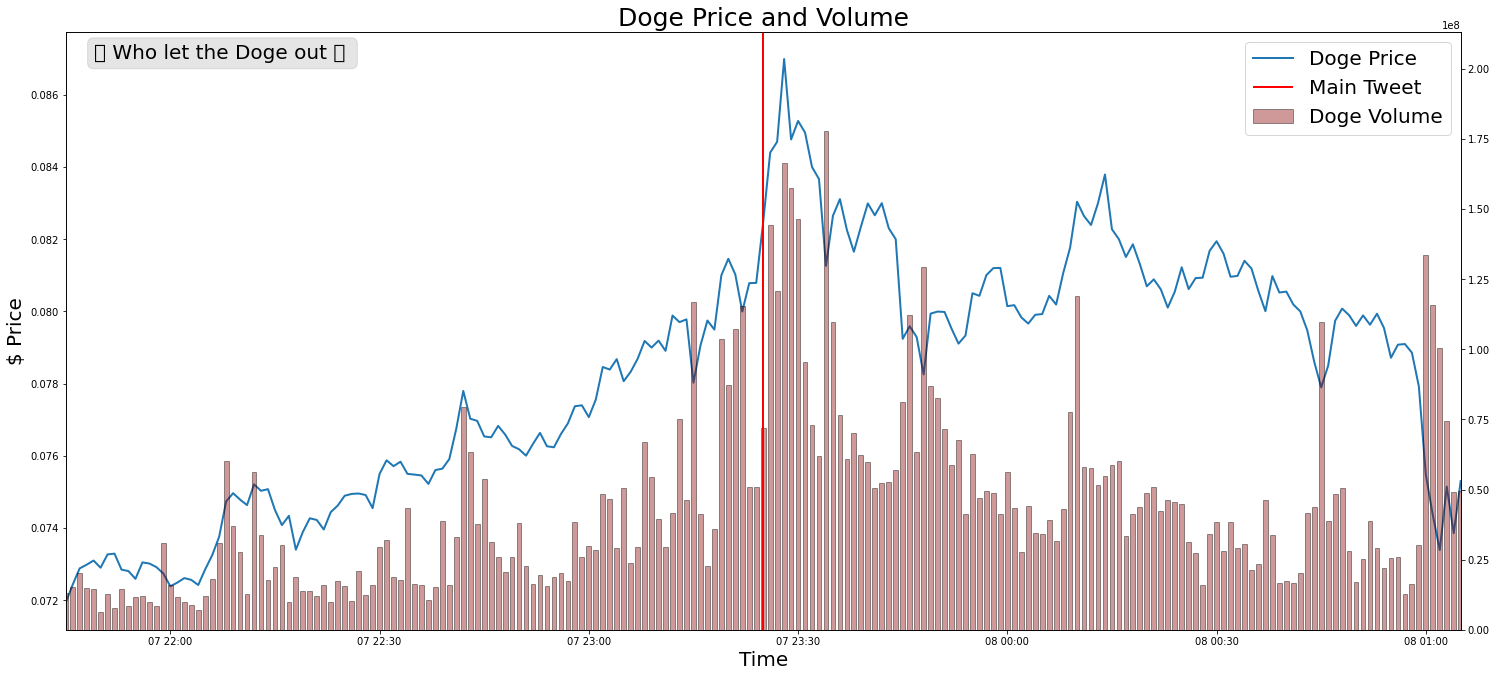

In [63]:
df['Date'] = df['timestamp'].apply(lambda x: dt.fromtimestamp(x))

for _, tweet in df_tweets_relevant.iterrows():
    timestamp = tweet['timestamp']
    doge_sliced = df[(df['timestamp'] >= timestamp-100*60) & (df['timestamp'] <= timestamp+100*60)]
    tweets_sliced = df_tweets[(df_tweets['timestamp'] >= timestamp-100*60) & (df_tweets['timestamp'] <= timestamp+100*60)]

    base_value = doge_sliced.iloc[0, 4]
    doge_sliced['CAR'] = doge_sliced['Close']/base_value

    fig = plt.figure(1, figsize = (25, 11))
    ax = fig.add_subplot(111)
    ax.plot(doge_sliced['Date'], doge_sliced['Close'], lw=2, label="Doge Price")

    ax2 = ax.twinx()
    ax2.bar(doge_sliced['Date'], doge_sliced['Volume'], label="Doge Volume", color='darkred', alpha=0.4, width=1/(35*60), edgecolor='black')
    ax2.vlines(dt.fromtimestamp(timestamp), label='Main Tweet', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='red', lw=2) 

    if len(tweets_sliced) > 1:
        ax2.vlines([dt.fromtimestamp(i) for i in tweets_sliced['timestamp'] if i != timestamp], label='Other Tweets', ymin=0, ymax=doge_sliced['Volume'].max()*1.2, colors='orange', lw=2) 
   
    ax2.set_ylim(0, doge_sliced['Volume'].max()*1.2)
    ax.set_xlim(min(doge_sliced['Date']), max(doge_sliced['Date']))
    ax.set_xlabel("Time", size=20)
    ax.set_ylabel("$ Price", size=20)

    t = [i + ' ' for i in tweet['Text'].split()]
    for i in range(7, len(t), 7):
        t.insert(i, '\n')
    anno = ''.join(t)

    ax.text(0.02, 0.98, anno, transform=ax.transAxes, bbox={'boxstyle':'round', 'facecolor':'black', 'alpha':0.1}, fontsize = 20, va='top')
    

    li, la = ax.get_legend_handles_labels()
    li2, la2 = ax2.get_legend_handles_labels()
    plt.legend(li+li2, la+la2, loc='best', fontsize = 20)
    # plt.legend(loc='best', fontsize=20)
    plt.title('Doge Price and Volume', size=25)

    plt.show()

    #print(tweet['Text'])

In [64]:
# log(x+1)
# 1. Schritt log(vol +1)
# 2. Schritt E(log(vol+1))
# 3. Schritt: log(vol+1) - E(log(vol+1))
# --> Abnormal Volume

In [65]:
m = min(df_tweets['timestamp'])
min(df[df['timestamp'] > m]['Volume'])

0.0